In [ ]:
%%capture
!pip install numpy
!pip install --no-cache-dir --upgrade music-fsl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from collections import defaultdict

import numpy as np
import random

import music_fsl.util as util
from music_fsl.data import ClassConditionalDataset
import torch
from typing import List, Dict, Any, Tuple

##TinySOL

In [ ]:
import os
import pandas as pd
import librosa
class TinySOLDataAnalyzer(ClassConditionalDataset):

    INSTRUMENTS = [
        'Bassoon', 'Viola', 'Trumpet in C', 'Bass Tuba',
        'Alto Saxophone', 'French Horn', 'Violin', 
        'Flute', 'Contrabass', 'Trombone', 'Cello', 
        'Clarinet in Bb', 'Oboe', 'Accordion'
    ]

    def __init__(self, 
            dataset_path: str = None
        ):
        self.instruments = self.INSTRUMENTS

        # initialize the tinysol dataset
        metadata = os.path.join(dataset_path, 'TinySOL_metadata.csv')
        df = pd.read_csv(metadata) 
        paths = df.iloc[:, 0].apply(lambda x: os.path.join(dataset_path, x))
        paths = paths.values.tolist()
        labels = df.iloc[:, 4].values

        # make sure the instruments passed in are valid
        for instrument in self.instruments:
            assert instrument in self.instruments, f"{instrument} is not a valid instrument"

        # load all tracks for this instrument
        self.tracks = []
        for path, label in zip(paths, labels):
            if label in self.instruments:
              self.tracks.append([path, label])

    @property
    def classlist(self) -> List[str]:
        return self.instruments

    @property
    def class_to_indices(self) -> Dict[str, List[int]]:
        # cache it in self._class_to_indices 
        # so we don't have to recompute it every time
        if not hasattr(self, "_class_to_indices"):
            self._class_to_indices = defaultdict(list)
            for i, track in enumerate(self.tracks):
                self._class_to_indices[track[1]].append(i)

        return self._class_to_indices

    def __getitem__(self, index) -> Dict:
        # load the track for this index
        track = self.tracks[index]
        data= {
        "path": track[0], 
        "label": track[1]
        }
        return data
    def get_durations(self):
      durations = []
      for i in self.tracks:
        y, sr = librosa.load(path = i[0])
        durations.append(librosa.get_duration(y=y, sr=sr))
      return durations


    def __len__(self) -> int:
        return len(self.tracks)

In [ ]:
tinysol = TinySOLDataAnalyzer("/content/drive/MyDrive/TinySOL2020")

In [ ]:
print(f"The dataset has {len(tinysol)} examples.")
print(f"The dataset has {len(tinysol.classlist)} classes.\n")

dataset_split = []
# print the number of examples for each class
for instrument, indices in tinysol.class_to_indices.items():
    dataset_split.append([instrument, len(indices) ])
    print(f"{instrument} has {len(indices)} examples")

The dataset has 2913 examples.
The dataset has 14 classes.

Bass Tuba has 108 examples
French Horn has 134 examples
Trombone has 117 examples
Trumpet in C has 96 examples
Accordion has 689 examples
Cello has 291 examples
Contrabass has 309 examples
Viola has 309 examples
Violin has 284 examples
Alto Saxophone has 99 examples
Bassoon has 126 examples
Clarinet in Bb has 126 examples
Flute has 118 examples
Oboe has 107 examples


In [ ]:
durations = tinysol.get_durations()

In [ ]:
import numpy as np
mean = np.mean(durations)
print(f'mean: {mean}')

min = np.min(durations)
print(f'min: {min}')

max = np.max(durations)
print(f'max: {max}')

std = np.std(durations)
print(f'std: {std}')

mean: 6.674925648025544
min: 1.3151927437641724
max: 16.235374149659865
std: 1.4805903826507871


In [ ]:
import numpy as np
num = [i[1] for i in dataset_split]
mean = np.mean(num)
print(f'mean: {mean}')

min = np.min(num)
print(f'min: {min}')

max = np.max(num)
print(f'max: {max}')

std = np.std(num)
print(f'std: {std}')

mean: 208.07142857142858
min: 96
max: 689
std: 156.83451892530107


['clarinet', 'distorted electric guitar', 'female singer', 'flute', 'piano', 'tenor saxophone', 'trumpet', 'violin']
[1311, 1854, 1744, 3555, 6032, 477, 627, 5971]


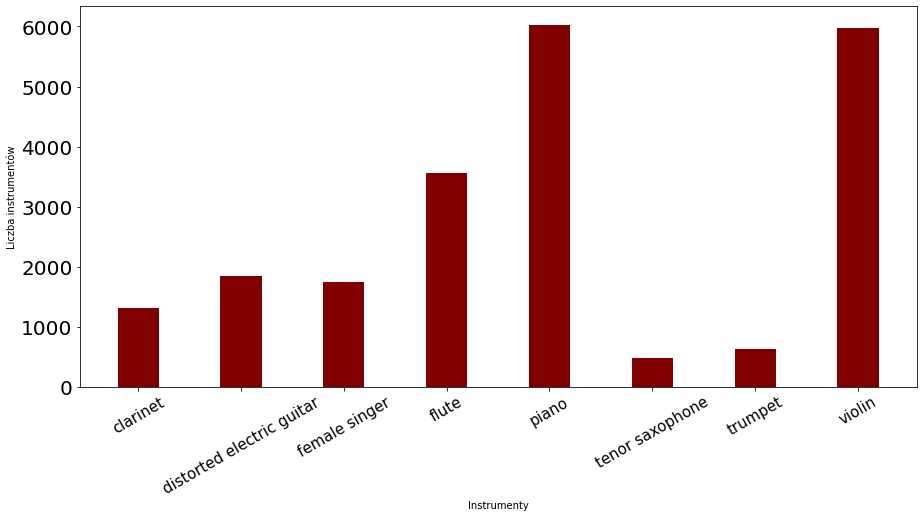

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
instruments = [i[0] for i in dataset_split]
print(instruments)
values = [i[1] for i in dataset_split]
print(values)
  
print
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(instruments, values, color ='maroon',
        width = 0.4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(rotation=30)
plt.xlabel("Instrumenty")
plt.ylabel("Liczba instrumentów")
plt.savefig('/content/tinysol_distribution.png')
plt.show()

## MedleySoloDb


In [ ]:
import os
import pandas as pd

class MedleySolosDb(ClassConditionalDataset):

    INSTRUMENTS = [
        'clarinet',
        'distorted electric guitar',
        'female singer',
        'flute',
        'piano',
        'tenor saxophone',
        'trumpet',
        'violin'
    ]

    def __init__(self, 
            dataset_path: str = None,
        ):

        self.instruments = self.INSTRUMENTS  

        metadata = os.path.join(dataset_path, 'Medley-solos-DB_metadata.csv')
        df = pd.read_csv(metadata) 

        # make sure the instruments passed in are valid
        for instrument in self.instruments:
            assert instrument in self.INSTRUMENTS, f"{instrument} is not a valid instrument"

        # load all tracks for this instrument
        self.tracks = []
        for index, row in df.iterrows():
            if row['instrument'] in self.instruments:
                file_name = f'Medley-solos-DB_{row["subset"]}-{row["instrument_id"]}_{row["uuid4"]}.wav.wav'
                wav_file = os.path.join(dataset_path, 'Medley-solos-DB', file_name)
                self.tracks.append([wav_file, row['instrument']])


    @property
    def classlist(self) -> List[str]:
        return self.instruments

    @property
    def class_to_indices(self) -> Dict[str, List[int]]:
        # cache it in self._class_to_indices 
        # so we don't have to recompute it every time
        if not hasattr(self, "_class_to_indices"):
            self._class_to_indices = defaultdict(list)
            for i, track in enumerate(self.tracks):
                self._class_to_indices[track[1]].append(i)

        return self._class_to_indices

    def __getitem__(self, index) -> Dict:
        # load the track for this index
        track = self.tracks[index]
        data= {
        "path": track[0], 
        "label": track[1]
        }
        return data
        
    def get_durations(self):
      durations = []
      for i in self.tracks:
        y, sr = librosa.load(path = i[0])
        durations.append(librosa.get_duration(y=y, sr=sr))
      return durations

    def __len__(self) -> int:
        return len(self.tracks)

In [ ]:
medleysolosdb = MedleySolosDb("/content/drive/MyDrive/Medley-solos-DB")

In [ ]:
print(f"The dataset has {len(medleysolosdb)} examples.")
print(f"The dataset has {len(medleysolosdb.classlist)} classes.\n")

dataset_split = []
# print the number of examples for each class
for instrument, indices in medleysolosdb.class_to_indices.items():
    dataset_split.append([instrument, len(indices) ])
    print(f"{instrument} has {len(indices)} examples")

The dataset has 21571 examples.
The dataset has 8 classes.

clarinet has 1311 examples
distorted electric guitar has 1854 examples
female singer has 1744 examples
flute has 3555 examples
piano has 6032 examples
tenor saxophone has 477 examples
trumpet has 627 examples
violin has 5971 examples


In [ ]:
durations_medleysolosdb = medleysolosdb.get_durations()

In [ ]:
import numpy as np
mean = np.mean(durations_medleysolosdb)
print(f'mean: {mean}')

min = np.min(durations_medleysolosdb)
print(f'min: {min}')

max = np.max(durations_medleysolosdb)
print(f'max: {max}')

std = np.std(durations_medleysolosdb)
print(f'std: {std}')

In [ ]:
import numpy as np
num = [i[1] for i in dataset_split]
mean = np.mean(num)
print(f'mean: {mean}')

min = np.min(num)
print(f'min: {min}')

max = np.max(num)
print(f'max: {max}')

std = np.std(num)
print(f'std: {std}')

mean: 2696.375
min: 477
max: 6032
std: 2101.505884925141


['clarinet', 'distorted electric guitar', 'female singer', 'flute', 'piano', 'tenor saxophone', 'trumpet', 'violin']
[1311, 1854, 1744, 3555, 6032, 477, 627, 5971]


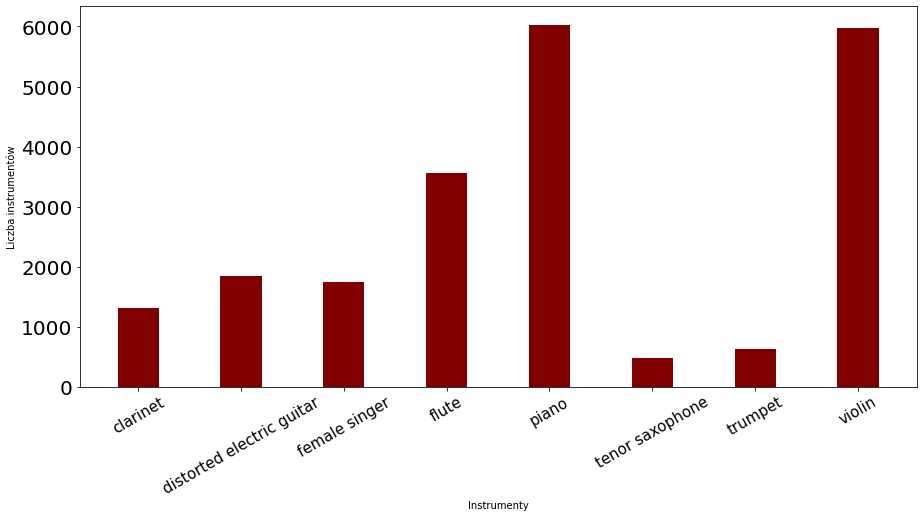

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
instruments = [i[0] for i in dataset_split]
print(instruments)
values = [i[1] for i in dataset_split]
print(values)
  
print
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(instruments, values, color ='maroon',
        width = 0.4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(rotation=30)
plt.xlabel("Instrumenty")
plt.ylabel("Liczba instrumentów")
plt.savefig('/content/medleysolosdb_distribution.png')
plt.show()

##GoodSounds


In [ ]:
class GoodSounds(ClassConditionalDataset):
    """
    Initialize a `GoodSounds Dataset Loader` dataset instance.
    
    Args:
        instruments (List[str]): A list of instruments to include in the dataset.
        duration (float): The duration of each audio clip in the dataset (in seconds).
        sample_rate (int): The sample rate of the audio clips in the dataset (in Hz).
        dataset - loaded mirdata.dataset
    """

    INSTRUMENTS = [
        'flute', 'cello', 'clarinet', 'trumpet', 'violin', 'sax_alto', 'sax_tenor', 'sax_bariton', 'sax_soprane', 'oboe', 'piccolo', 'bass'
    ]

    def __init__(self, 
            dataset_path: str = None
        ):

        self.instruments = self.INSTRUMENTS  
        self.dataset_path = dataset_path

        # make sure the instruments passed in are valid
        for instrument in self.instruments:
            assert instrument in self.INSTRUMENTS, f"{instrument} is not a valid instrument"

        # load all tracks for this instrument
        self.tracks = []
        for dir in os.listdir(self.dataset_path):
            ins = dir.split('_')[0]
            if ins in self.instruments:
                for subdir_dir, dirs_dir, files_dir in os.walk(os.path.join(self.dataset_path, dir, 'neumann')):
                    for file in files_dir:
                        if file.endswith('.wav'):
                            self.tracks.append([os.path.join(self.dataset_path, dir, 'neumann', file), ins])
            else:
                ins = f'{dir.split("_")[0]}_{dir.split("_")[1]}'
                if ins in self.instruments:
                    for subdir_dir, dirs_dir, files_dir in os.walk(os.path.join(self.dataset_path, dir, 'neumann')):
                        for file in files_dir:
                            if file.endswith('.wav'):
                                self.tracks.append([os.path.join(self.dataset_path, dir, 'neumann', file), ins])


    @property
    def classlist(self) -> List[str]:
        return self.instruments

    @property
    def class_to_indices(self) -> Dict[str, List[int]]:
        # cache it in self._class_to_indices 
        # so we don't have to recompute it every time
        if not hasattr(self, "_class_to_indices"):
            self._class_to_indices = defaultdict(list)
            for i, track in enumerate(self.tracks):
                self._class_to_indices[track[1]].append(i)

        return self._class_to_indices

    def __getitem__(self, index) -> Dict:
        # load the track for this index
        track = self.tracks[index]
        data= {
        "path": track[0], 
        "label": track[1]
        }
        return data


    def __len__(self) -> int:
        return len(self.tracks)

In [ ]:
goodsounds = GoodSounds('/content/drive/MyDrive/good_sounds/sound_files')

In [ ]:
print(f"The dataset has {len(goodsounds)} examples.")
print(f"The dataset has {len(goodsounds.classlist)} classes.\n")

dataset_split = []
# print the number of examples for each class
for instrument, indices in goodsounds.class_to_indices.items():
    dataset_split.append([instrument, len(indices) ])
    print(f"{instrument} has {len(indices)} examples")

The dataset has 7823 examples.
The dataset has 12 classes.

violin has 1053 examples
cello has 951 examples
oboe has 247 examples
flute has 968 examples
sax_soprane has 334 examples
clarinet has 1671 examples
bass has 159 examples
trumpet has 920 examples
sax_tenor has 449 examples
sax_alto has 395 examples
sax_bariton has 288 examples
piccolo has 388 examples


In [ ]:
import numpy as np
num = [i[1] for i in dataset_split]
mean = np.mean(num)
print(f'mean: {mean}')

min = np.min(num)
print(f'min: {min}')

max = np.max(num)
print(f'max: {max}')

std = np.std(num)
print(f'std: {std}')

mean: 651.9166666666666
min: 159
max: 1671
std: 435.6882406670572


['violin', 'cello', 'oboe', 'flute', 'sax_soprane', 'clarinet', 'bass', 'trumpet', 'sax_tenor', 'sax_alto', 'sax_bariton', 'piccolo']
[1053, 951, 247, 968, 334, 1671, 159, 920, 449, 395, 288, 388]


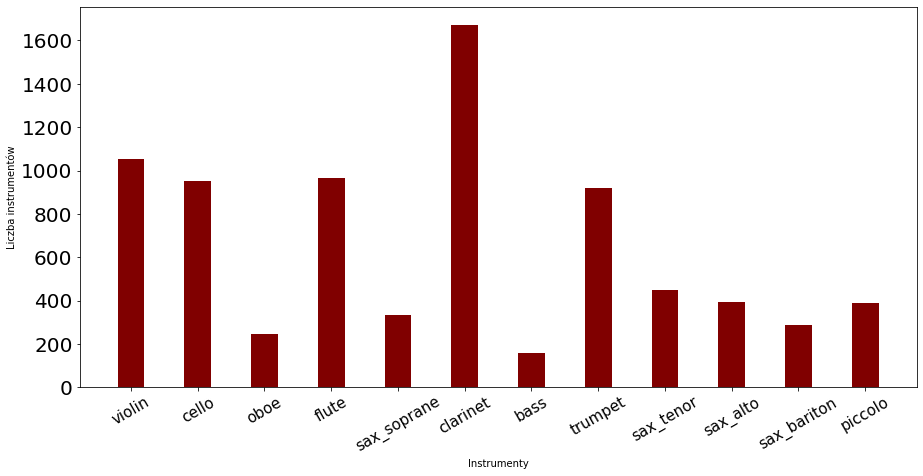

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
instruments = [i[0] for i in dataset_split]
print(instruments)
values = [i[1] for i in dataset_split]
print(values)
  
print
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(instruments, values, color ='maroon',
        width = 0.4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(rotation=30)
plt.xlabel("Instrumenty")
plt.ylabel("Liczba instrumentów")
plt.savefig('/content/goodsounds_distribution.png')
plt.show()

##Irmas


In [ ]:
from collections import defaultdict
import mirdata
import music_fsl.util as util
from typing import List, Dict
import os
import sys


class IRMAS(ClassConditionalDataset):
    """
    Initialize a `IRMAS` dataset instance.

    Args:
        instruments (List[str]): A list of instruments to include in the dataset.
        duration (float): The duration of each audio clip in the dataset (in seconds).
        sample_rate (int): The sample rate of the audio clips in the dataset (in Hz).
    """

    INSTRUMENTS = [
        'Cello', 'Clarinet', 'Flute', 'Acoustic guitar',
        'Electric guitar', 'Organ', 'Piano', 
        'Saxophone', 'Trumpet', 'Violin', 'Human singing voice'
    ]

    INSTRUMENTS_KEY = {
        'cel': 'Cello', 'cla' : 'Clarinet', 'flu' : 'Flute', 'gac' : 'Acoustic guitar',
        'gel' : 'Electric guitar', 'org' : 'Organ', 'pia' : 'Piano', 
        'sax' : 'Saxophone', 'tru' : 'Trumpet', 'vio' : 'Violin', 'voi' : 'Human singing voice'
    }
    def __init__(self, 
            dataset_path: str = 'irmas',
            val = False,
        ):
        self.instruments = self.INSTRUMENTS
        self.instruments_key = self.INSTRUMENTS_KEY

        if val == False and dataset_path == 'irmas':
            dir_path = os.path.dirname(os.path.realpath(__file__))
            dataset_path = os.path.join(os.path.dirname(dir_path), dataset_path)
        

        # initialize IRMAS path 
        if val == False:
          if os.path.exists(dataset_path):
            self.dataset_path = dataset_path
          else:
            sys.exit("Dataset path does not exist")
        
        if val:
          self.dataset_path = dataset_path

        # make sure the instruments passed in are valid
        for instrument in self.instruments:
            assert instrument in self.INSTRUMENTS, f"{instrument} is not a valid instrument"

        # load all tracks for this instrument
        if val:
            self.load_all_tracks_val()
        else:
            self.load_all_tracks()


    def load_all_tracks(self):
        self.tracks = []
        for subdir, dirs, files in os.walk(self.dataset_path):
            for dir in dirs:
                if dir in self.instruments_key.keys():
                    for subdir_dir, dirs_dir, files_dir in os.walk(os.path.join(subdir, dir)):
                        for file in files_dir:
                            self.tracks.append([os.path.join(subdir, dir, file), self.instruments_key[dir]])

    def load_all_tracks_val(self):
        self.tracks = []
        for paths in self.dataset_path:
          for subdir, dirs, files in os.walk(paths, topdown=True):
              for file in sorted(files)[::2]:
                  f = open(os.path.join(subdir, file), "rb")
                  tags = f.readlines()
                  for tag in tags:
                      tag = tag[:3].decode("utf-8") 
                      f.close()
                      if tag in self.instruments_key.keys():
                          wav_file = os.path.join(subdir, file).replace('.txt', '.wav')
                          if os.path.exists(wav_file):
                            self.tracks.append([wav_file, self.instruments_key[tag]])

    @property
    def classlist(self) -> List[str]:
        return self.instruments

    @property
    def class_to_indices(self) -> Dict[str, List[int]]:
        # cache it in self._class_to_indices 
        # so we don't have to recompute it every time
        if not hasattr(self, "_class_to_indices"):
            self._class_to_indices = defaultdict(list)
            for i, track in enumerate(self.tracks):
                self._class_to_indices[track[1]].append(i)

        return self._class_to_indices

    def __getitem__(self, index) -> Dict:
        # load the track for this index
        track = self.tracks[index]
        data= {
        "path": track[0], 
        "label": track[1]
        }
        return data

    def __len__(self) -> int:
        return len(self.tracks)

In [ ]:
# initialize the datasets
train_data = IRMAS(
    dataset_path = '/content/drive/MyDrive/irmas/training/IRMAS-TrainingData'
)

val_data = IRMAS(
    dataset_path = ['/content/drive/MyDrive/irmas/testing/Part1', '/content/drive/MyDrive/irmas/testing/IRMAS-TestingData-Part2/IRTestingData-Part2', '/content/drive/MyDrive/irmas/testing/IRMAS-TestingData-Part3/Part3'],
    val = True
)

In [ ]:
print(len(train_data.tracks))
for instrument, indices in train_data.class_to_indices.items():
    print(f"{instrument} has {len(indices)} examples")

6431
Organ has 682 examples
Human singing voice has 778 examples
Flute has 451 examples
Acoustic guitar has 637 examples
Piano has 721 examples
Cello has 388 examples
Trumpet has 577 examples
Saxophone has 352 examples
Violin has 580 examples
Clarinet has 505 examples
Electric guitar has 760 examples


In [ ]:
import numpy as np
num = [i[1] for i in dataset_split]
mean = np.mean(num)
print(f'mean: {mean}')

min = np.min(num)
print(f'min: {min}')

max = np.max(num)
print(f'max: {max}')

std = np.std(num)
print(f'std: {std}')

mean: 651.9166666666666
min: 159
max: 1671
std: 435.6882406670572


['violin', 'cello', 'oboe', 'flute', 'sax_soprane', 'clarinet', 'bass', 'trumpet', 'sax_tenor', 'sax_alto', 'sax_bariton', 'piccolo']
[1053, 951, 247, 968, 334, 1671, 159, 920, 449, 395, 288, 388]


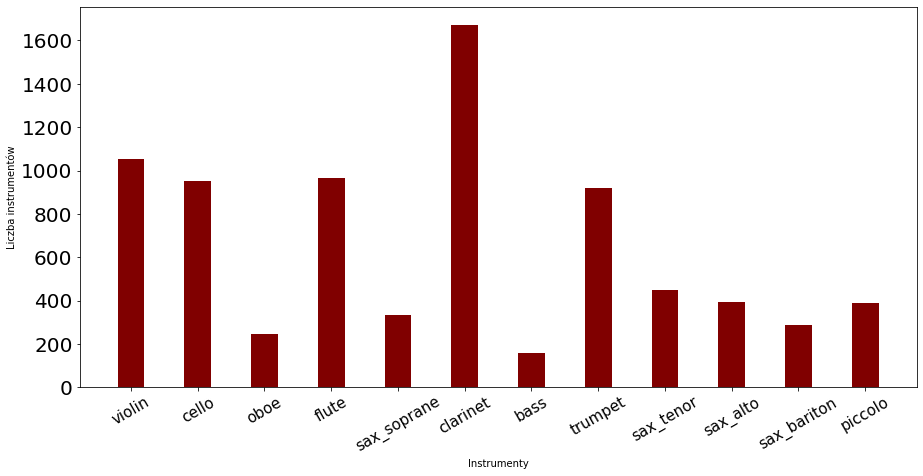

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
instruments = [i[0] for i in dataset_split]
print(instruments)
values = [i[1] for i in dataset_split]
print(values)
  
print
fig = plt.figure(figsize = (15, 7))
 
# creating the bar plot
plt.bar(instruments, values, color ='maroon',
        width = 0.4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(rotation=30)
plt.xlabel("Instrumenty")
plt.ylabel("Liczba instrumentów")
plt.savefig('/content/irmas_train_distribution.png')
plt.show()

In [ ]:
print(len(val_data.tracks))
for instrument, indices in val_data.class_to_indices.items():
    print(f"{instrument} has {len(indices)} examples")

4917
Electric guitar has 942 examples
Human singing voice has 1044 examples
Piano has 995 examples
Acoustic guitar has 535 examples
Organ has 361 examples
Cello has 111 examples
Saxophone has 326 examples
Trumpet has 167 examples
Violin has 211 examples
Flute has 163 examples
Clarinet has 62 examples
